In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

# 지도 시각화
import folium
import json

In [107]:
gangseo = pd.read_csv("data/서울특별시 강서구_코로나19 월별 확진자 및 사망자 현황_20220211.csv", 
                      encoding="euc-kr", thousands=",")
gangseo = gangseo[12:24]
gangseo

,연도,월,확진자 수,사망자 수,데이터기준일자
12,2021,1,213,11,2022-02-11
13,2021,2,94,2,2022-02-11
14,2021,3,130,1,2022-02-11
15,2021,4,213,1,2022-02-11
16,2021,5,182,0,2022-02-11
17,2021,6,209,0,2022-02-11
18,2021,7,564,1,2022-02-11
19,2021,8,648,2,2022-02-11
20,2021,9,869,2,2022-02-11
21,2021,10,708,4,2022-02-11


## 1. 강서구 월 별 코로나 확진자 그래프

<AxesSubplot:>

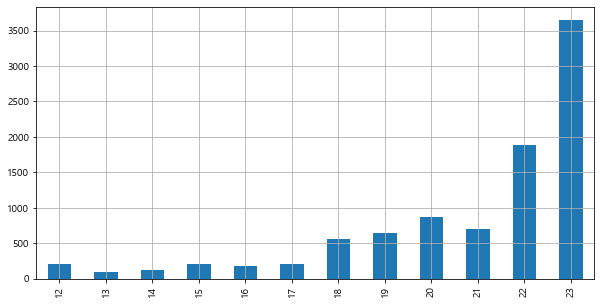

In [108]:
# 확진자 수 총 합 그래프
gangseo['확진자 수'].plot(kind="bar", figsize=(10,5), grid=True)

In [109]:
# 강서구의 확진자 수도 앞에서 본 서울 총 확진자 그래프처럼 7월부터 급격히 증가하는 모습을 보이고
# 12월에 가장 많은 확진자가 발생한 모습을 볼 수 있다.

<AxesSubplot:>

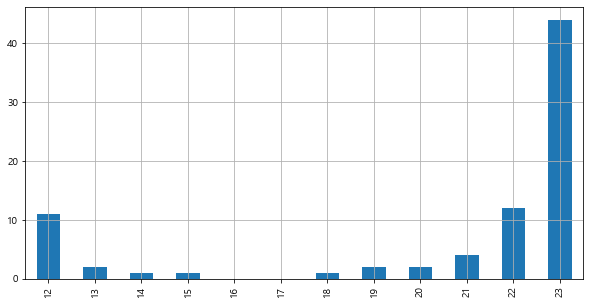

In [110]:
# 사망자 수 총 합 그래프
gangseo['사망자 수'].plot(kind="bar", figsize=(10,5), grid=True)

In [111]:
# 사망자 역시 1월 이후에 줄어드는 모습을 보이다가 7월부터 서서히 늘어나며 12월에 최고치를 찍은 모습을 볼 수 있다.

## 2. 강서구 동 별 분석

In [112]:
gangseo_dong = pd.read_csv("data/서울특별시 강서구_코로나19 확진자 현황_20220124.csv", 
                      encoding="euc-kr", thousands=",")
gangseo_dong

,월,가양동,개화동,공항동,내발산동,등촌동,마곡동,방화동,염창동,오쇠동,외발산동,화곡동
0,1월,25,0,8,19,28,14,27,11,0,0,81
1,2월,9,1,1,2,10,7,8,7,0,0,49
2,3월,6,0,5,12,15,22,21,7,0,0,42
3,4월,20,2,6,22,33,15,34,13,0,1,67
4,5월,16,0,2,16,22,13,12,11,0,0,90
5,6월,15,2,4,25,22,23,19,24,0,0,75
6,7월,51,1,25,44,65,41,57,46,1,1,232
7,8월,47,11,21,46,71,59,66,54,0,0,273
8,9월,46,1,25,72,78,74,80,63,0,2,428
9,10월,48,1,29,83,79,60,56,34,0,1,317


In [113]:
# 각 동별 2021년 총 확진자 수

gangseo_dong.set_index('월', inplace=True)
gangseo_dong.loc["합"] = gangseo_dong.sum()
gangseo_dong

,가양동,개화동,공항동,내발산동,등촌동,마곡동,방화동,염창동,오쇠동,외발산동,화곡동
월,,,,,,,,,,,
1월,25,0,8,19,28,14,27,11,0,0,81
2월,9,1,1,2,10,7,8,7,0,0,49
3월,6,0,5,12,15,22,21,7,0,0,42
4월,20,2,6,22,33,15,34,13,0,1,67
5월,16,0,2,16,22,13,12,11,0,0,90
6월,15,2,4,25,22,23,19,24,0,0,75
7월,51,1,25,44,65,41,57,46,1,1,232
8월,47,11,21,46,71,59,66,54,0,0,273
9월,46,1,25,72,78,74,80,63,0,2,428


<AxesSubplot:>

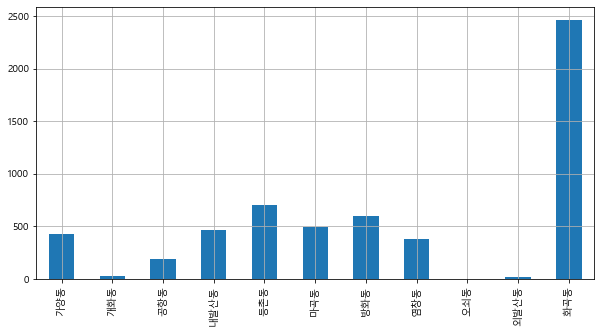

In [114]:
# 막대 그래프
gangseo_dong.loc['합'].plot(kind="bar", figsize=(10,5), grid=True)

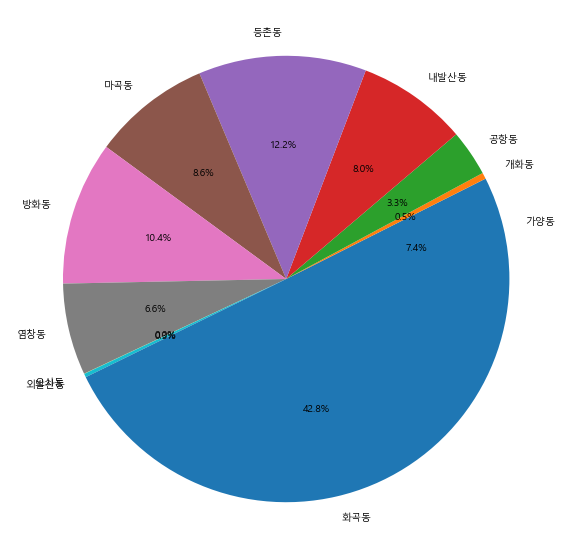

In [115]:
# 원 그래프

plt.figure(figsize=(10,10))
plt.axis('equal')
plt.pie(gangseo_dong.loc['합'], labels=gangseo_dong.columns, autopct="%1.1f%%")
plt.show()

In [98]:
# 강서구 내에서 화곡동에서 가장 많은 확진자가 발생한 모습을 볼 수 있고 오쇠동, 개화동, 외발산동은 적게 발생한 것을
# 확인할 수 있다.

In [116]:
#gangseo_dong.columns.name='지역'
gangseo_dong=gangseo_dong.transpose()
#gangseo_dong.reset_index()

gangseo_dong

월,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,합
가양동,25,9,6,20,16,15,51,47,46,48,140,5,428
개화동,0,1,0,2,0,2,1,11,1,1,7,0,26
공항동,8,1,5,6,2,4,25,21,25,29,65,2,193
내발산동,19,2,12,22,16,25,44,46,72,83,119,0,460
등촌동,28,10,15,33,22,22,65,71,78,79,275,3,701
마곡동,14,7,22,15,13,23,41,59,74,60,166,0,494
방화동,27,8,21,34,12,19,57,66,80,56,211,9,600
염창동,11,7,7,13,11,24,46,54,63,34,113,0,383
오쇠동,0,0,0,0,0,0,1,0,0,0,0,0,1
외발산동,0,0,0,1,0,0,1,0,2,1,8,2,15
